In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

In [2]:
q1 = pd.read_csv('/datasets/query_1.csv')
q3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
q1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
q3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [5]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


На первый взгляд, данные выглядят хорошо:

1. В них нет пропусков;
2. Типы соответствуют тем данным, что содержатся в соответствующих столбцах



Попробуем оценить цифры.

In [7]:
q1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [8]:
q3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


В первой таблице можно выделить два категории самолетов:

1. "Легкие", у каждого из которых более 4000 тысяч полетов
2. "Тяжелые", у которых количество рейсов лежит в диапазоне от 500 до 1000

Мы можем предположить, что в анализируемой выборке очень много данных о "локальных" перелетах на небольших самолетах.

Вторая таблица вызывает вопрос из-за разницы между средним и максимальным значением. Учитывая все же относительно небольшое стандартное отклонение, можем предположить, что максимальные значения принадлежат городам-хабам: Москва, Санкт-Петербург, Новосибирск и т.д. 

Проверим это предположение: 

In [9]:
#сформируем топ 10 городов по среднему количеству рейсов
q3.loc[q3['average_flights'] > 6].sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Мы видим, что наше предположение верно и никакой аномалии тут нет. Максимальное значение в данном случае закономерно принадлежит Москве, как крупнейшему транспортному хабу с несколькими функционирующими аэропортами.

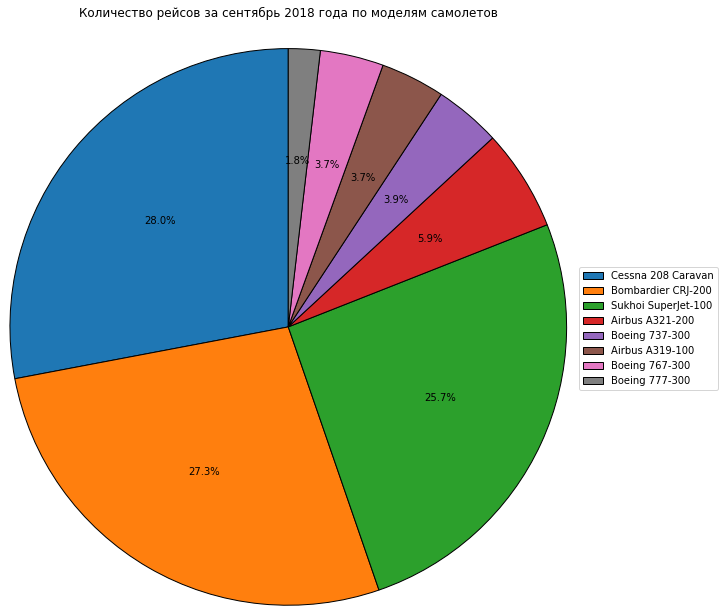

In [10]:
#построим круговую диаграмму для ознакомления с долями различных моделей самолетов по количеству рейсов в сентябре 2018 года
flights_amount = q1.sort_values('flights_amount', ascending=False).flights_amount #количество рейсов с сортировкой
planes = q1.sort_values('flights_amount', ascending=False).model #наименования самолетов для легенды

plt.pie(flights_amount, wedgeprops={'edgecolor': 'black'}, 
        startangle=90, autopct='%1.1f%%', radius=3.2) 
plt.legend(planes, loc='upper right', bbox_to_anchor=(2.5, 0.8))
plt.title('Количество рейсов за сентябрь 2018 года по моделям самолетов', y=1.9)
plt.show()

Как и говорилось выше, на три "небольших" модели самолета приходится основная часть перелетов. Это объяснимо тем, что в анализируемой выборке большей частью фигурируют перелеты между городами внутри страны, где достаточно производительности таких самолетов. 

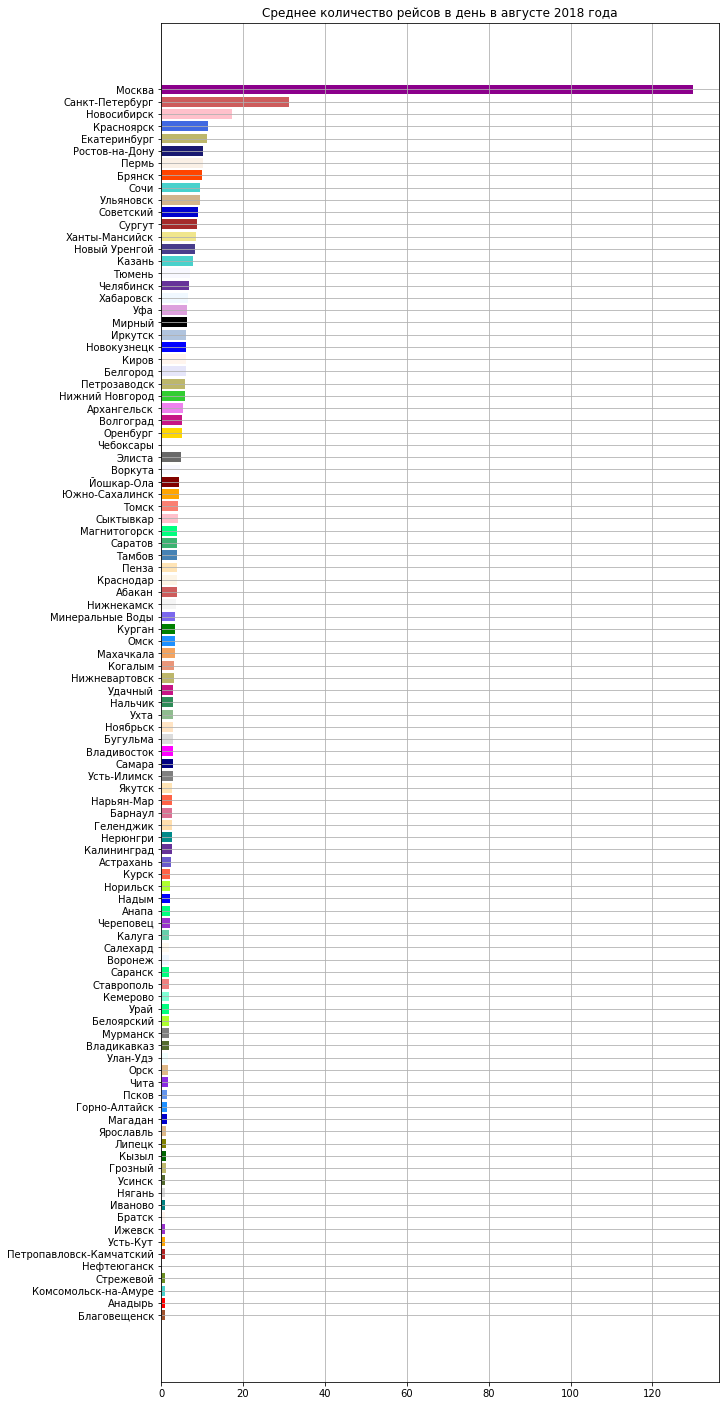

In [11]:
#построим столбчатую диаграмму
index = q3.sort_values('average_flights', ascending=True).city
values = q3.sort_values('average_flights', ascending=True).average_flights

n = q3['city'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
c = random.choices(all_colors, k=n)

fig, ax = plt.subplots()
plt.barh(index, values, color=c)
fig.set_figwidth(10)
fig.set_figheight(25)
ax.grid()
plt.title('Среднее количество рейсов в день в августе 2018 года')
plt.show()

Мы видим, что лидеры выборки по среднему количеству рейсов в день сконцетрированы большей частью в европейской части страны. По мере удаления от центральной части сокращается количество рейсов до исчезающе малых значений: примерно после первой трети столбцов значения становятся практически равными, медленно сокращаясь примерно от 3 до 1 рейса в день. Мы можем предположить, что это связано с перелетами на большие расстояния внутри страны через транспортные хабы, все из которых сконцентрированы в верхней части диаграммы. 

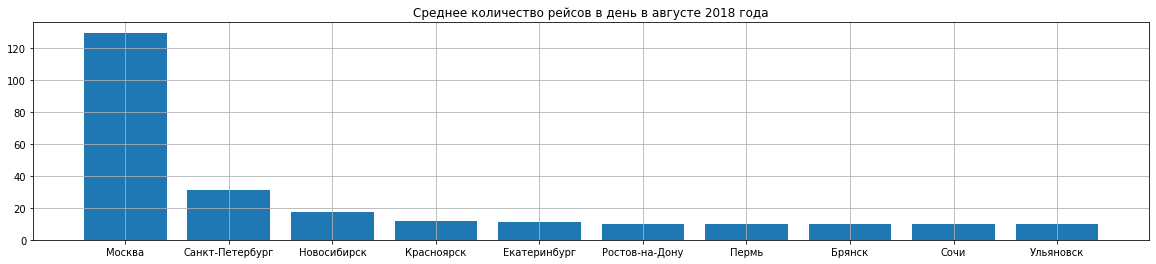

In [12]:
index = q3.sort_values('average_flights', ascending=False).head(10).city
values = q3.sort_values('average_flights', ascending=False).head(10).average_flights

fig, ax = plt.subplots()
plt.bar(index, values)
fig.set_figwidth(20)
plt.title('Среднее количество рейсов в день в августе 2018 года')
ax.grid()
plt.show()

Мы видим, что таблицу с огромным отрывом (порядка 3.5 раз от "второго места") возглавляет Москва как наиболее крупный и востребованный транспортный хаб в нашей стране. Второе место также за городом федерального значения - Санкт-Петербургом. Такой отрыв от лидера объясним не только в целом более низкой востребованностью города как хаба, но и количеством функционирующих аэропортов. 

Далее мы видим несколько городов, распороложенных в центре нашей страны: Сибирь и Урал - там также довольно высокий уровень среднего количества рейсов в день, так как эти города, предположительно, выступают своеобразными распределительными пунктами для дальнейшего движения как внутри региона, так и далее на восток или север страны. 

Далее среднее количество рейсов снижается до исчезающе малых величин одновременно со снижением уровня "востребованности" городов.

<h1>Выводы:</h1>

1. 80% всех перелетов приходятся на 3 из 8 моделей самолетов: 
    - Cessna 208 Caravan (~9-13 пассажиров за рейс)	- 28% перелетов от выборки
    - Bombardier CRJ-200 (~50 человек за рейс) - 27.3% перелетов от выборки
    - Sukhoi SuperJet-100 (~87-108 человек за рейс) - 25.7% перелетов от выборки
2. Мы можем предположить, что Cessna и Bombardier используются для локальных перелетов между небольшими аэродромами. В то же время SSJ-100 применяется на равне с, например, A320-100 для перелетов между относительно крупными городами. Его лидерство по количеству перелетов среди других самолетов возможно объяснить государственной поддержкой компании-производителя самолетов
3. По среднему количеству перелетов по городам явно видно "лидерство" Москвы (около 130 перелетов в день). На втором месте со значительным отличием находится Санкт-Петербург (примерно 31 перелет в день), что примерно в 4.2 раза меньше. Предположительно, это можно объяснить двумя факторами: 
    - Москва - транспортный хаб России (из большинства городов страны нередко нет прямого перелета в необходимый город и для этого используется Москва как хаб
    - В Москве 3 действующих аэропорта, расположенных в непосредственной близости к городу 
4. На диаграмме, отражающей среднее среднее количество перелетов, видно, что среднее количество снижает до 1-3. Мы можем предположить, что это либо регулярный перелет в Москву, либо перелет между населенными перелетами на легкомоторном самолете
5. В топ 10 городов по среднему количеству перелетов входят города европейской части страны, а также города центральной части страны, где среднее количество перелетов в день практически идентично (в районе отметки 10 перелетов)